In [1]:
import geoplot as gplt 
import geopandas as gpd 
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import mapclassify as mc
import geoplot.crs as gcrs
import numpy as np
import seaborn as sns

In [12]:
#loading primary dataset 

bridge_points = gpd.read_file("../GennyPlots/ShapeFilesFile/NBI/National_Bridge_Inventory.shp")
pd.set_option('display.max_columns', None)
bridge_points.head()


,STATE_CODE,STRUCTURE_,RECORD_TYP,ROUTE_PREF,SERVICE_LE,ROUTE_NUMB,DIRECTION_,HIGHWAY_DI,COUNTY_COD,PLACE_CODE,FEATURES_D,CRITICAL_F,FACILITY_C,LOCATION_0,MIN_VERT_C,KILOPOINT_,BASE_HWY_N,LRS_INV_RO,SUBROUTE_N,LAT_016,LONG_017,DETOUR_KIL,TOLL_020,MAINTENANC,OWNER_022,FUNCTIONAL,YEAR_BUILT,TRAFFIC_LA,TRAFFIC__1,ADT_029,YEAR_ADT_0,DESIGN_LOA,APPR_WIDTH,MEDIAN_COD,DEGREES_SK,STRUCTURE1,RAILINGS_0,TRANSITION,APPR_RAIL_,APPR_RAIL1,HISTORY_03,NAVIGATION,NAV_VERT_C,NAV_HORR_C,OPEN_CLOSE,SERVICE_ON,SERVICE_UN,STRUCTUR_1,STRUCTUR_2,APPR_KIND_,APPR_TYPE_,MAIN_UNIT_,APPR_SPANS,HORR_CLR_M,MAX_SPAN_L,STRUCTUR_3,LEFT_CURB_,RIGHT_CURB,ROADWAY_WI,DECK_WIDTH,VERT_CLR_O,VERT_CLR_U,VERT_CLR_1,LAT_UND_RE,LAT_UND_MT,LEFT_LAT_U,DECK_COND_,SUPERSTRUC,SUBSTRUCTU,CHANNEL_CO,CULVERT_CO,OPR_RATING,OPERATING_,INV_RATING,INVENTORY_,STRUCTURAL,DECK_GEOME,UNDCLRENCE,POSTING_EV,WATERWAY_E,APPR_ROAD_,WORK_PROPO,WORK_DONE_,IMP_LEN_MT,DATE_OF_IN,INSPECT_FR,FRACTURE_0,UNDWATER_L,SPEC_INSPE,FRACTURE_L,UNDWATER_1,SPEC_LAST_,BRIDGE_IMP,ROADWAY_IM,TOTAL_IMP_,YEAR_OF_IM,OTHER_STAT,OTHER_ST_1,OTHR_STATE,STRAHNET_H,PARALLEL_S,TRAFFIC_DI,TEMP_STRUC,HIGHWAY_SY,FEDERAL_LA,YEAR_RECON,DECK_STRUC,SURFACE_TY,MEMBRANE_T,DECK_PROTE,PERCENT_AD,NATIONAL_N,PIER_PROTE,BRIDGE_LEN,SCOUR_CRIT,FUTURE_ADT,YEAR_OF_FU,MIN_NAV_CL,FED_AGENCY,SUBMITTED_,BRIDGE_CON,LOWEST_RAT,DECK_AREA,STATUS,DATE,LATDD,LONGDD,geometry
0,29,1,1,3,1,00006,0,01,021,64550,IS 29,0.0,MO 6 E,S 2 T 57 N R 35 W,99.99,0.793,1,0000003556,0,39463723,094473709,10,3,01,01,14,1958,6,4,15423,2023,4,25.0,0,7,0,1,0,0,0,5,N,0.0,0.0,A,5,1,4,02,0,00,4,0,23.8,17.1,61.6,1.5,1.5,23.8,28.5,99.99,H,4.83,H,3.4,5.7,6,7,7,N,N,1,58.5,1,35.1,7,5,5,5,N,8,None,None,0.0,722,24,N,N,N,None,None,None,0,0,0,0,None,None,None,0,N,2,None,1,0,1992,1,1,0,1,5,0,None,Y,N,20821,2043,0.0,N,29,F,6,1755.60,AM,1202,39.776933,-94.793517,POINT (-94.79352 39.77693)
1,29,10,1,2,1,00036,0,01,025,27784,LIT OTTER CR,0.0,US 36 E,S 21 T 57 N R 27 W,99.99,80.150,1,0000003560,0,39440616,093562572,1,3,01,01,02,1958,4,0,8566,2023,4,24.7,2,0,0,N,N,N,N,5,0,0.0,0.0,A,1,5,2,19,0,00,2,0,24.7,3.0,6.4,0.0,0.0,0.0,0.0,99.99,N,0.00,N,0.0,0.0,N,N,N,6,5,0,72.0,0,43.2,5,N,N,5,8,8,None,None,0.0,1222,24,N,N,N,None,None,None,0,0,0,0,None,None,None,0,N,2,None,1,0,2000,N,N,N,N,41,1,None,Y,8,17989,2043,0.0,N,29,F,5,158.08,AM,1202,39.735267,-93.940350,POINT (-93.94035 39.73527)
2,29,100,1,1,1,00029,0,03,165,29026,OWL CR,0.0,IS 29 S,S 25 T 54 N R 35 W,99.99,157.835,1,0000005878,0,39273317,094471789,1,3,01,01,01,1958,4,0,36821,2023,5,34.1,2,30,0,1,1,1,1,5,0,0.0,0.0,A,1,5,2,19,0,00,2,0,30.4,2.7,6.6,0.0,0.0,0.0,0.0,99.99,N,0.00,N,0.0,0.0,N,N,N,7,4,0,99.9,0,99.9,4,N,N,5,8,8,35,1,1.3,1222,24,N,N,N,None,None,None,204,20,306,2024,None,None,None,1,N,2,None,1,0,0,N,N,N,N,25,1,None,Y,8,75483,2043,0.0,N,29,P,4,225.06,AM,0303,39.466333,-94.787725,POINT (-94.78773 39.46633)
3,29,1000,1,2,1,00060,0,06,077,70000,JAMES RVR,0.0,US 60 E,S 15 T 28 N R 21 W,99.99,141.811,1,0000007782,0,37072768,093133368,1,3,01,01,12,1965,2,0,15996,2023,4,15.2,1,20,0,1,1,1,1,5,0,0.0,0.0,P,1,5,4,02,0,00,3,0,15.2,45.7,120.4,0.2,0.2,15.2,16.1,99.99,N,0.00,N,0.0,0.0,7,5,6,8,N,1,45.9,1,27.9,5,9,N,5,8,8,None,None,0.0,722,24,N,N,N,None,None,None,0,0,0,0,None,None,None,2,R,1,None,1,0,2009,1,4,0,0,12,1,None,Y,8,24794,2043,0.0,N,29,F,5,1938.44,AM,0303,37.124864,-93.226503,POINT (-93.2265 37.12486)
4,29,10000,1,3,1,00076,0,07,067,45272,CLEVER CR,0.0,MO 76 E,S 1 T 26 N R 14 W,99.99,291.470,0,None,None,36581862,092254722,48,3,01,01,07,1940,2,0,419,2023,0,7.3,0,0,0,0,0,0,0,5,0,0.0,0.0,A,1,5,2,01,0,00,5,0,6.7,3.2,15.5,0.0,0.0,6.7,7.2,99.99,N,0.00,N,0.0,0.0,5,5,5,6,N,1,26.1,1,16.2,5,4,N,5,4,6,None,None,0.0,223,24,N,N,N,None,None,None,0,0,0,0,None,None,None,0,N,2,None,0,0,0,1,6,0,0,12,0,None,Y,8,649,2043,0.0,N,29,F,5,111.60,AM,1202,36.972156,-92.429808,POINT (-92.42981 36.97216)


In [ ]:
#loading in contextualizing data, county line polygons, MODOT District polygons, and MODOT maintained roads lines

county_bounds = gpd.read_file("../GennyPlots/ShapeFilesFile/MO_County_Boundaries/MO_County_Boundaries.shp")
county_bounds.to_crs(crs=None, epsg=4326, inplace=True)
districts = gpd.read_file("../GennyPlots/ShapeFilesFile/MO_MoDOT_Districts/MO_MoDOT_Districts.shp")
districts.to_crs(crs=None, epsg=4326, inplace=True)
roads = gpd.read_file("../GennyPlots/ShapeFilesFile/MO_MoDOT_Roads_Arcs/MO_MoDOT_Roads_Arcs.shp")
roads.to_crs(crs=None, epsg=4326, inplace=True)

/opt/conda/lib/python3.11/site-packages/pyogrio/geopandas.py:49: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  res = pd.to_datetime(ser, **datetime_kwargs)


In [4]:
#getting counts per district
count_df = bridge_points.groupby("HIGHWAY_DI")["STRUCTURE_"].count().to_frame().reset_index()
count_df["HIGHWAY_DI"]=count_df["HIGHWAY_DI"].apply(lambda x: x[1:])
districts = districts.rename(columns={"DISTRICT_N":"HIGHWAY_DI"})
count_df["HIGHWAY_DI"]=count_df["HIGHWAY_DI"].astype(int)
districts
df4 = count_df.merge(districts, on = "HIGHWAY_DI")
gdf = gpd.GeoDataFrame(df4, crs="EPSG:4326")
# df4 = df4[["HIGHWAY_DI","STRUCTURE_", "geometry"]]
# df4

gdf

,HIGHWAY_DI,STRUCTURE_,OBJECTID,DISTRICT_1,DISTRICT_A,SE_ANNO_CA,Shape__Are,Shape__Len,geometry
0,1,1351,1,NORTHWEST,NW,None,4.764621e+10,1.337988e+06,"POLYGON ((-95.03063 40.57624, -95.01015 40.575..."
1,2,1092,2,NORTHEAST,NE,None,4.049008e+10,1.121644e+06,"POLYGON ((-91.68576 40.57695, -91.68638 40.575..."
2,3,1425,3,KANSAS CITY,KC,None,2.428183e+10,9.276540e+05,"POLYGON ((-94.76355 39.53134, -94.75288 39.531..."
3,4,1291,4,CENTRAL,CD,None,4.733163e+10,1.124795e+06,"POLYGON ((-92.10889 39.10824, -92.10942 39.093..."
4,5,1159,5,ST. LOUIS,SL,None,1.175764e+10,6.052030e+05,"POLYGON ((-90.44583 38.96689, -90.44488 38.966..."
5,6,1838,6,SOUTHWEST,SW,None,5.472244e+10,1.083621e+06,"POLYGON ((-93.75142 38.56144, -93.7329 38.5610..."
6,7,2197,7,SOUTHEAST,SE,None,6.813452e+10,1.715569e+06,"POLYGON ((-90.24467 38.11442, -90.2445 38.1142..."


In [6]:
adt_df = bridge_points.groupby("COUNTY_COD")["ADT_029"].sum().to_frame()
len_df = bridge_points.groupby("COUNTY_COD")["STRUCTUR_3"].sum().to_frame()
count_df = bridge_points.groupby("COUNTY_COD")["STRUCTURE_"].count().to_frame()
temp_df = adt_df.merge(len_df, on = "COUNTY_COD")
county_bounds = county_bounds.rename(columns={'COUNTYFIPS': 'COUNTY_COD'})
df3 = county_bounds.merge(temp_df, on = "COUNTY_COD")
adt_per_ft = []
for i, county in df3.iterrows():
    adt_per_ft.append((df3["ADT_029"][i])/(df3["STRUCTUR_3"][i]))

df3["adt_per_ft"]=adt_per_ft
df3 = df3.merge(count_df, on = "COUNTY_COD")
df3

,OBJECTID,COUNTYNAME,COUNTY_COD,COUNTYGNIS,NAME_UCASE,ACRES,SQ_MILES,CNTY_SEAT,CO_CLASS,GlobalID,SHAPE__Are,SHAPE__Len,geometry,ADT_029,STRUCTUR_3,adt_per_ft,STRUCTURE_
0,1,Clark,045,758477,CLARK,327632.419997,511.925656,Kahoka,3,edbc7424-cc96-4e1e-8718-ac8d0be45bc2,2.290636e+09,215585.598263,"POLYGON ((-91.72911 40.61363, -91.7212 40.6030...",168416,3156.5,53.355299,58
1,2,Atchison,005,758457,ATCHISON,351990.513001,549.985177,Rock Port,3,5ceb0618-1811-4ce7-b196-a094713818cd,2.460518e+09,241160.104192,"POLYGON ((-95.20235 40.57847, -95.20239 40.566...",211241,4722.8,44.727916,80
2,3,Scotland,199,758552,SCOTLAND,280948.966704,438.982760,Memphis,3,ae574e24-e9ec-4209-8a16-181ca23b8f08,1.966985e+09,177755.776899,"POLYGON ((-91.94509 40.47537, -91.94526 40.460...",33295,1707.8,19.495843,42
3,4,Schuyler,197,758551,SCHUYLER,197084.747448,307.944918,Lancaster,3,b39a84b1-d551-4ea5-a158-d7ba79d1b8dd,1.380691e+09,205422.665326,"POLYGON ((-92.35069 40.59327, -92.35076 40.578...",42656,1139.2,37.443820,44
4,5,Nodaway,147,758528,NODAWAY,561734.052590,877.709457,Maryville,3,9a0312d3-e080-44e2-a8e0-ac4916ecb8df,3.920230e+09,279075.939040,"POLYGON ((-94.60088 40.31487, -94.60131 40.300...",91196,4031.5,22.620861,92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,111,McDonald,119,758518,MCDONALD,345102.871821,539.223237,Pineville,3,b5bdd6a0-e221-41e4-b2b7-20de33dd2513,2.174199e+09,193316.633692,"POLYGON ((-94.07704 36.50209, -94.07703 36.498...",360834,6122.6,58.934766,104
111,112,Dunklin,069,758489,DUNKLIN,350410.474198,547.516366,Kennett,3,cab2ce83-c197-4a21-9147-d01e44d38f66,2.184761e+09,340685.641285,"POLYGON ((-89.95952 36.62857, -89.96002 36.628...",268255,5454.2,49.183198,111
112,113,Pemiscot,155,758532,PEMISCOT,326247.923468,509.762380,Caruthersville,3,d7288a50-9d37-4931-9284-e313ffc4a989,2.030144e+09,234820.349909,"POLYGON ((-89.67368 36.40043, -89.6724 36.4002...",465568,7295.0,63.820151,128
113,114,Marion,127,758517,MARION,284331.719607,444.268312,Palmyra,3,f4748637-cdfd-4699-b6b1-0b5754a2f4eb,1.953006e+09,198066.238505,"POLYGON ((-91.73454 39.65748, -91.75336 39.657...",427695,8642.2,49.489135,83


/tmp/ipykernel_462/308674767.py:67: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  extent= districts.buffer(.25).total_bounds)


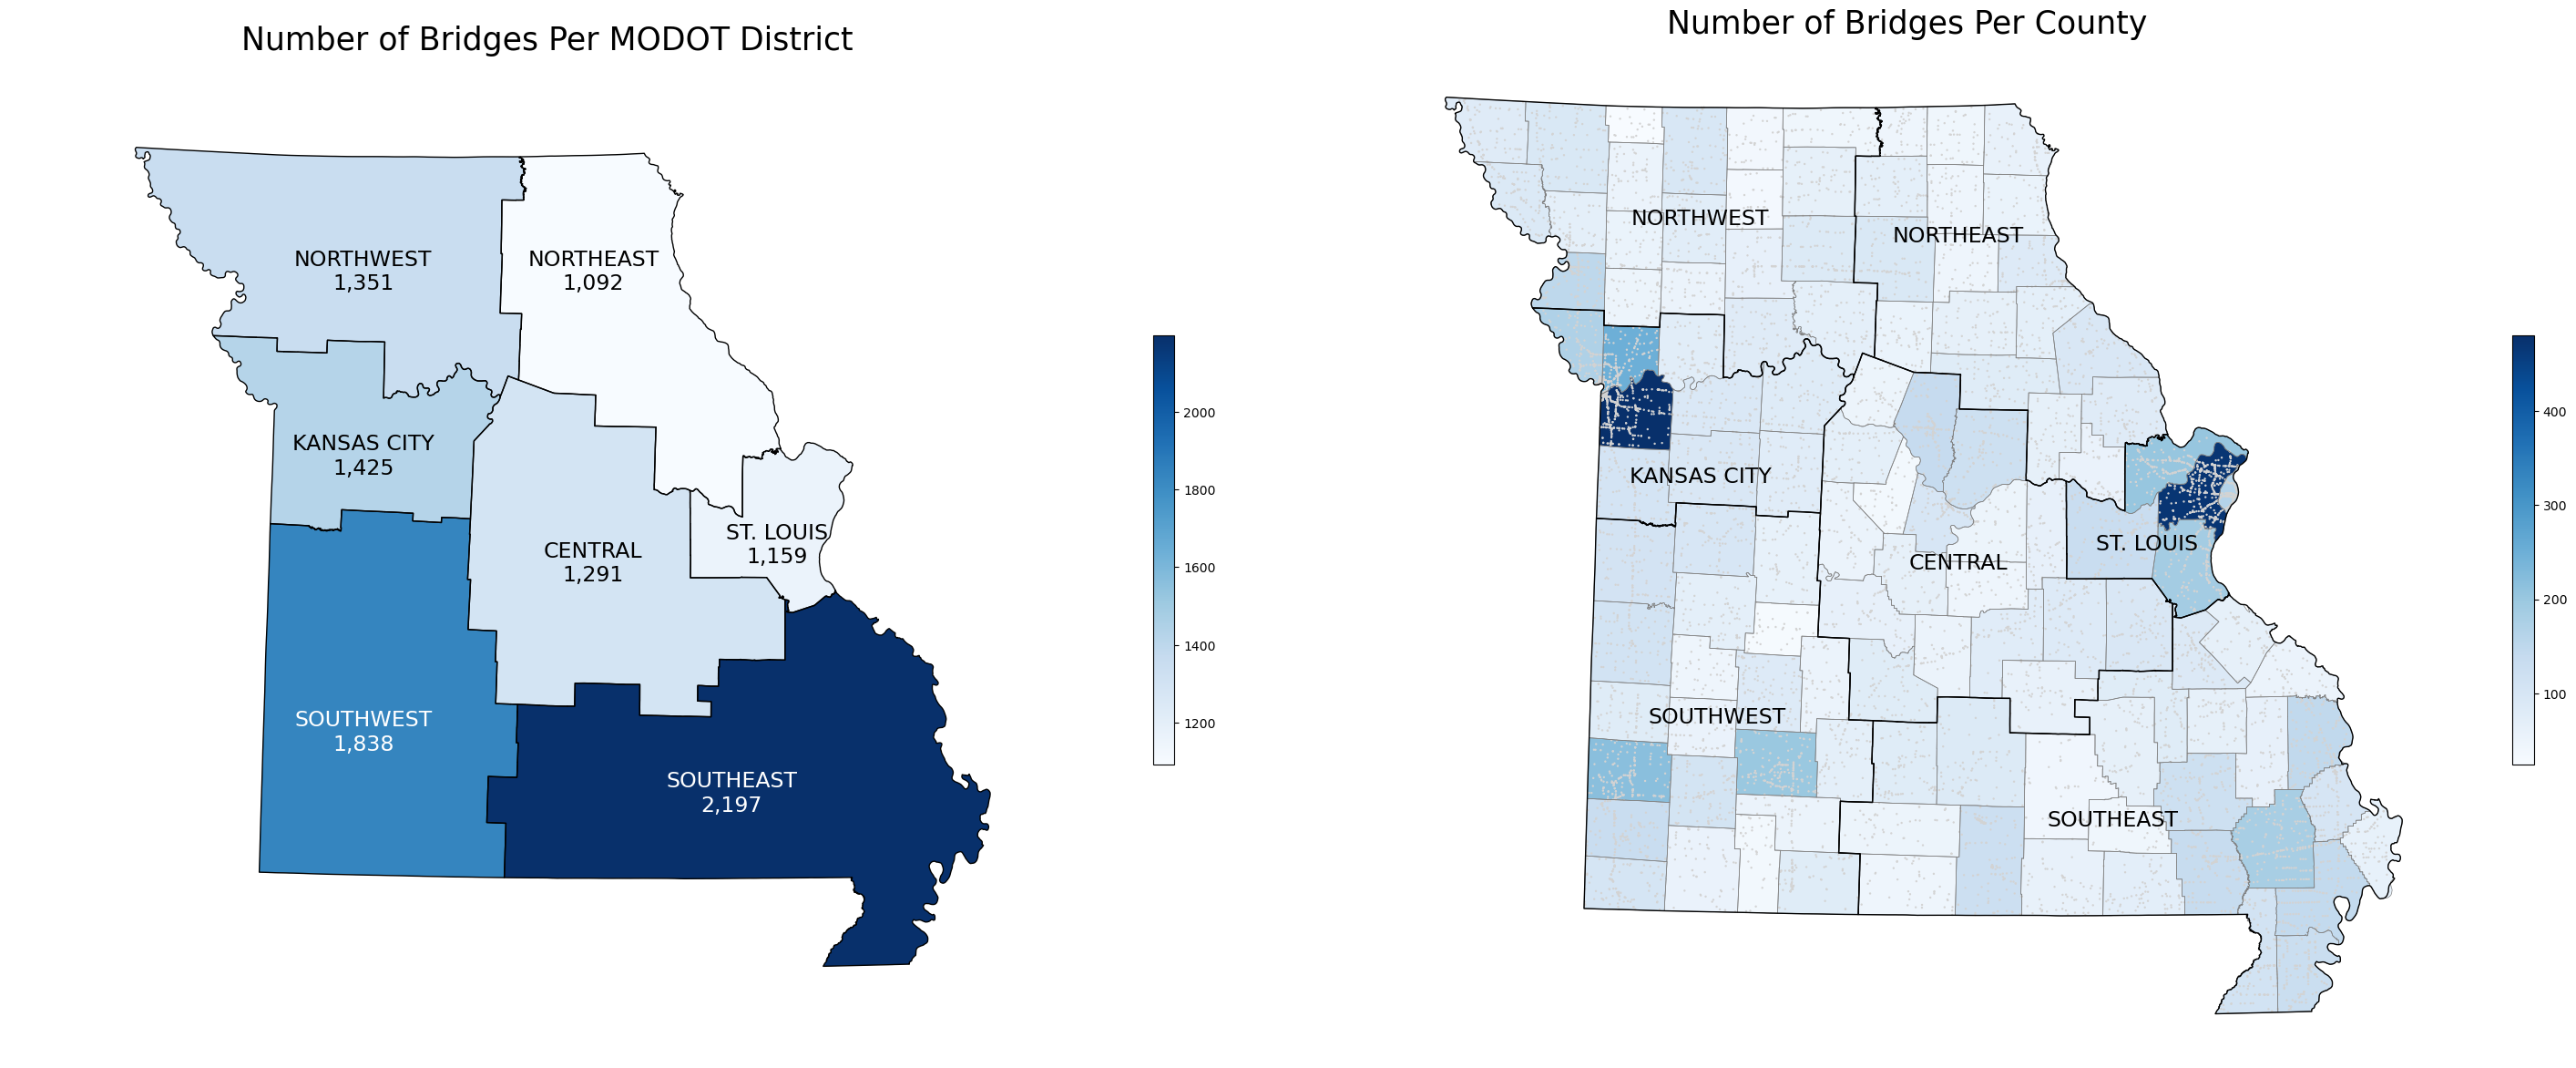

In [11]:
proj = gcrs.AlbersEqualArea(central_latitude=39.5055, central_longitude=-91.5238)

fig, (ax2,ax1) = plt.subplots(1, 2, figsize=(30, 16), subplot_kw={'projection': proj})
plt.tight_layout()

gplt.choropleth(
    df3.set_index('COUNTY_COD').loc[:, ['STRUCTURE_', 'geometry']],
    hue='STRUCTURE_', cmap='Blues',
    linewidth=0.0, 
    ax=ax1, 
    legend=True, 
    legend_kwargs={"shrink": 0.3, "orientation": "vertical"},
    zorder=1
)

gplt.polyplot(
    county_bounds,
    linewidth=.5,
    projection=proj,
    facecolor="none",
    edgecolor='grey',
    alpha=1,
    ax=ax1,
    zorder=2,
)

#adding in MODOT districts to aid in contextualizing analysis
gplt.polyplot(
    districts,
    linewidth=1,
    projection=proj,
    facecolor="none",
    edgecolor='black',
    alpha=1,
    ax=ax1,
    zorder=3,
)

ax1.set_title("Number of Bridges Per County", fontsize=25)

gplt.choropleth(
    gdf,
    hue='STRUCTURE_', 
    cmap='Blues',
    linewidth=0.0, 
    ax=ax2, 
    legend=True, 
    legend_kwargs={"shrink": 0.3, "orientation": "vertical"},
    zorder=1
)

gplt.polyplot(
    districts,
    linewidth=1,
    projection=proj,
    facecolor="none",
    edgecolor='black',
    alpha=1,
    ax=ax2,
    zorder=4,
)
gplt.pointplot(bridge_points.geometry,
               color="lightgrey", 
               s=.7, 
               ax=ax1, 
               alpha = 1,
               extent= districts.buffer(.25).total_bounds)


ax2.text(-200000,50000,"NORTHWEST\n1,351", fontsize=17, ha='center', va='center',)
ax2.text(-200000,-70000,"KANSAS CITY\n1,425", fontsize=17, ha='center', va='center')
ax2.text(-200000,-250000,"SOUTHWEST\n1,838", color='white',fontsize=17, ha='center', va='center')
ax2.text(-50000,50000,"NORTHEAST\n1,092", fontsize=17, ha='center', va='center')
ax2.text(-50000,-140000,"CENTRAL\n1,291", fontsize=17, ha='center', va='center')
ax2.text(70000,-128000,"ST. LOUIS\n1,159", fontsize=17, ha='center', va='center')
ax2.text(40000,-290000,"SOUTHEAST\n2,197", color='white',fontsize=17, ha='center', va='center')
ax1.text(-200000,60000,"NORTHWEST", fontsize=17, ha='center', va='center',)
ax1.text(-200000,-90000,"KANSAS CITY", fontsize=17, ha='center', va='center')
ax1.text(-190000,-230000,"SOUTHWEST",fontsize=17, ha='center', va='center')
ax1.text(-50000,50000,"NORTHEAST", fontsize=17, ha='center', va='center')
ax1.text(-50000,-140000,"CENTRAL", fontsize=17, ha='center', va='center')
ax1.text(60000,-129000,"ST. LOUIS", fontsize=17, ha='center', va='center')
ax1.text(40000,-290000,"SOUTHEAST",fontsize=17, ha='center', va='center')
ax2.set_title("Number of Bridges Per MODOT District", fontsize=25);
